In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
## loading data as DataFrame type
AAPL_F = pd.read_csv('../individual_stocks_5yr/AAPL_data.csv', index_col='Date')
AAPL_F.index = pd.to_datetime(AAPL_F.index)
SandP500_all_stocks = pd.read_csv('../Dataset/all_stocks_5yr.csv', index_col='Date')
SandP500_all_stocks.index = pd.to_datetime(SandP500_all_stocks.index)
SandP500_all_stocks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 606801 entries, 2012-08-13 to 2017-08-11
Data columns (total 6 columns):
Open      606417 non-null float64
High      606593 non-null float64
Low       606574 non-null float64
Close     606801 non-null float64
Volume    606395 non-null float64
Name      606801 non-null object
dtypes: float64(5), object(1)
memory usage: 32.4+ MB


In [3]:
## pick-up the null data.
GOOG = SandP500_all_stocks[SandP500_all_stocks['Name']=='GOOG']
GOOG_null = GOOG[GOOG['Volume'].isnull()]

In [4]:
type(AAPL_F)

pandas.core.frame.DataFrame

In [5]:
SandP500_all_stocks.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [6]:
## 10 Selected Stock List
stock_list = ["AAPL", "FB", "AMZN", 'GOOGL', 'GOOG', 'NVDA', 'IBM', 'MSFT', 'INTC', 'MU']

## Use loop to select data
for temp in stock_list:
    ## conditional selection
    temp_stock_data = SandP500_all_stocks[SandP500_all_stocks['Name'] == temp] 
    if temp == stock_list[0]:
        stock_price_selected = temp_stock_data
    else:      
        stock_price_selected = stock_price_selected.append(temp_stock_data)

## check output dimension
stock_price_selected.shape

(12580, 6)

In [7]:
## reshape the data by pivot function
close_pivot_data = pd.pivot_table(stock_price_selected, values="Close", 
                                 columns = "Name", index="Date")
volume_pivot_data = pd.pivot_table(stock_price_selected, values="Volume", 
                                 columns = "Name", index="Date")
open_pivot_data = pd.pivot_table(stock_price_selected, values="Open", 
                                 columns = "Name", index="Date")
high_pivot_data = pd.pivot_table(stock_price_selected, values="High", 
                                 columns = "Name", index="Date")
low_pivot_data = pd.pivot_table(stock_price_selected, values="Low", 
                                 columns = "Name", index="Date")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170C8F31940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000170C9425C50>]], dtype=object)

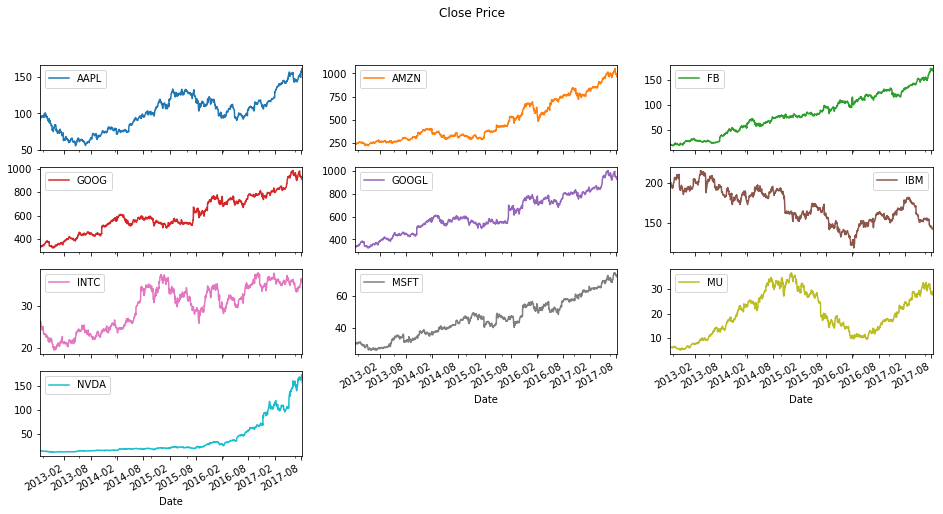

In [8]:
close_pivot_data.plot(subplots=True, figsize=(16, 8), layout=(4, 3), title ="Close Price", sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170C9D6EA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000170CB8BFE80>]], dtype=object)

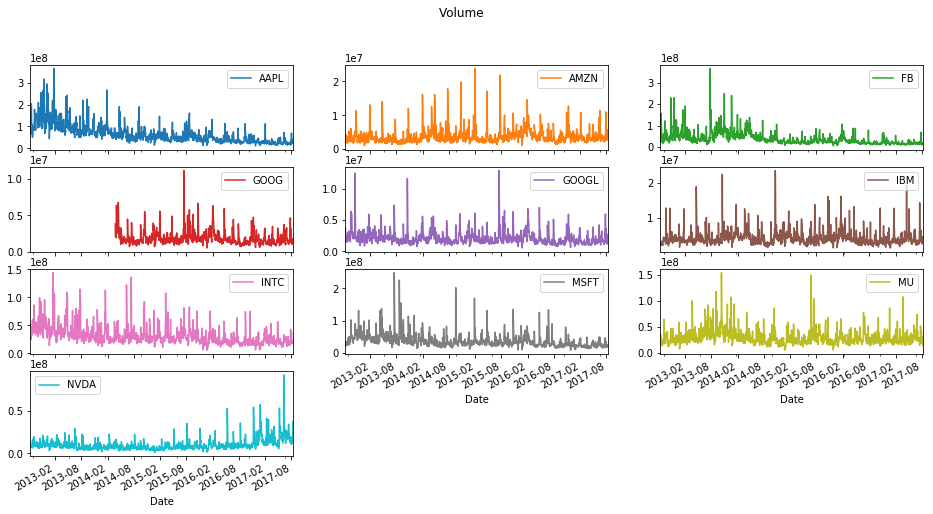

In [9]:
volume_pivot_data.plot(subplots=True, figsize=(16, 8), layout=(4, 3), title ="Volume", sharex=True)

In [10]:
## plot candlestick chart

In [11]:
## Compute Summary Statistic
close_stat_summary = close_pivot_data.describe()
volume_stat_summary = volume_pivot_data.describe()
open_stat_summary = open_pivot_data.describe()
high_stat_summary = high_pivot_data.describe()
low_stat_summary = low_pivot_data.describe()
close_stat_summary

Name,AAPL,AMZN,FB,GOOG,GOOGL,IBM,INTC,MSFT,MU,NVDA
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,101.041208,492.915238,81.610405,605.088291,616.599809,171.688728,29.891733,45.906184,19.666113,38.397623
std,24.956509,230.566459,39.728840,163.045352,170.631830,21.302960,5.366750,12.199729,8.617776,37.896776
min,55.790000,220.600000,17.730000,323.270000,323.910000,117.850000,19.360000,26.370000,5.170000,11.380000
25%,77.702500,305.035000,49.570000,507.015000,508.212500,154.755000,24.525000,36.045000,12.535000,15.580000
50%,100.750000,384.635000,78.615000,571.220000,579.170000,170.620000,31.305000,45.345000,18.185000,20.400000
75%,117.150000,697.275000,114.880000,739.942500,759.822500,189.942500,34.717500,54.340000,27.637500,40.062500
max,161.060000,1052.800000,172.450000,983.680000,1004.280000,215.800000,38.100000,74.220000,36.490000,172.350000


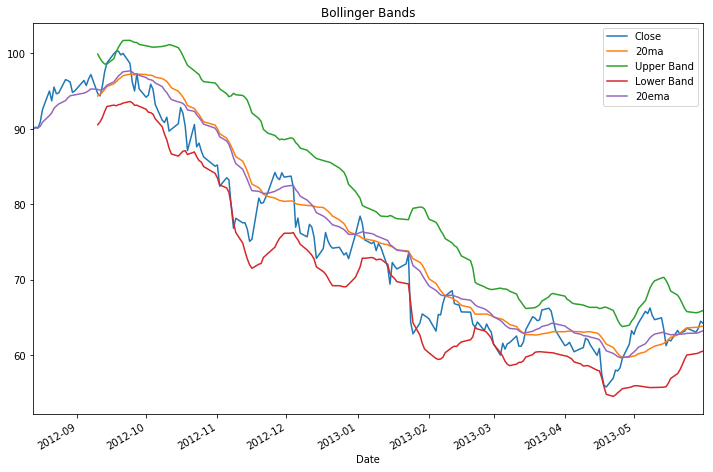

In [12]:
## ma, EMA, BBand
AAPL = SandP500_all_stocks[SandP500_all_stocks['Name'] == 'AAPL'][:]  # last [:] can reomve warning of "a value is trying to be copy of a slice from a dataframe"
AAPL["20ma"] = AAPL['Close'].rolling(window=20, win_type='boxcar').mean()
AAPL["20ema"] = AAPL['Close'].ewm(span=20).mean()
AAPL["std"] = AAPL['Close'].rolling(window=20).std()
AAPL["Upper Band"] = AAPL['20ema'] + 2*AAPL['std']
AAPL["Lower Band"] = AAPL['20ema'] - 2*AAPL['std']
AAPL_BBand = AAPL[0:200].plot(y=['Close', '20ma', 'Upper Band', 'Lower Band', '20ema'],figsize=(12,8), title='Bollinger Bands')

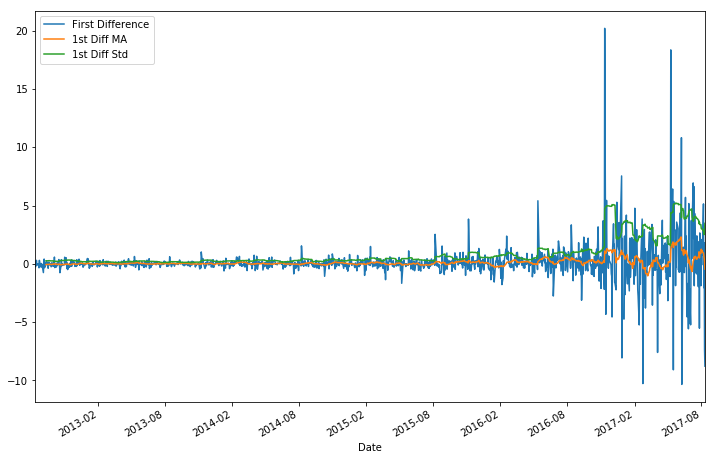

In [13]:
## NVDA Stock Close Price
NVDA = SandP500_all_stocks[SandP500_all_stocks['Name'] == 'NVDA'][:]
#NVDA_Close = NVDA['Close'].plot(figsize=(20,12), title="NVDA Close Stock Price")
## NVDA Time Series Analysis
NVDA['First Difference'] = NVDA['Close'] - NVDA['Close'].shift()
NVDA['1st Diff MA'] = NVDA['First Difference'].rolling(window=20).mean()
NVDA['1st Diff Std'] = NVDA['First Difference'].rolling(window=20).std()
NVDA_TS_analysis = NVDA.plot(y=['First Difference', '1st Diff MA', '1st Diff Std'], figsize=(12, 8))

'\n# plot normal & natural log\nfig, axes = plt.subplots(1, 2, figsize=(18,6))\n      \naxes[0].plot(NVDA[\'Close\'])\naxes[0].set_title("NVDA Close - Normal scale")\n\naxes[1].plot(NVDA[\'Natural Log\'])\naxes[1].set_yscale("log")\naxes[1].set_title("NVDA Close - Logarithmic scale (y)");\n'

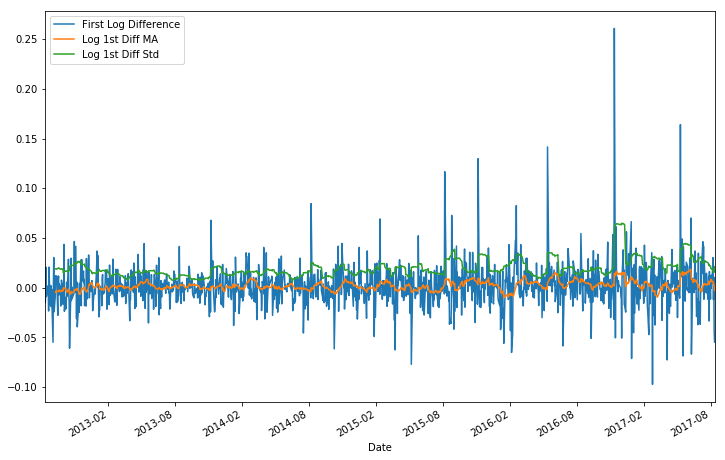

In [14]:
## NVDA close price of log scale
NVDA['Natural Log'] = NVDA['Close'].apply(lambda x:np.log(x))
NVDA['First Log Difference'] = NVDA['Natural Log'] - NVDA['Natural Log'].shift()
NVDA['Log 1st Diff MA'] = NVDA['First Log Difference'].rolling(window=20).mean()
NVDA['Log 1st Diff Std'] = NVDA['First Log Difference'].rolling(window=20).std()

NVDA_Log_TS_analysis = NVDA.plot(y=['First Log Difference', 'Log 1st Diff MA', 'Log 1st Diff Std'], figsize=(12, 8))

'''
# plot normal & natural log
fig, axes = plt.subplots(1, 2, figsize=(18,6))
      
axes[0].plot(NVDA['Close'])
axes[0].set_title("NVDA Close - Normal scale")

axes[1].plot(NVDA['Natural Log'])
axes[1].set_yscale("log")
axes[1].set_title("NVDA Close - Logarithmic scale (y)");
'''



C:\Users\oldan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


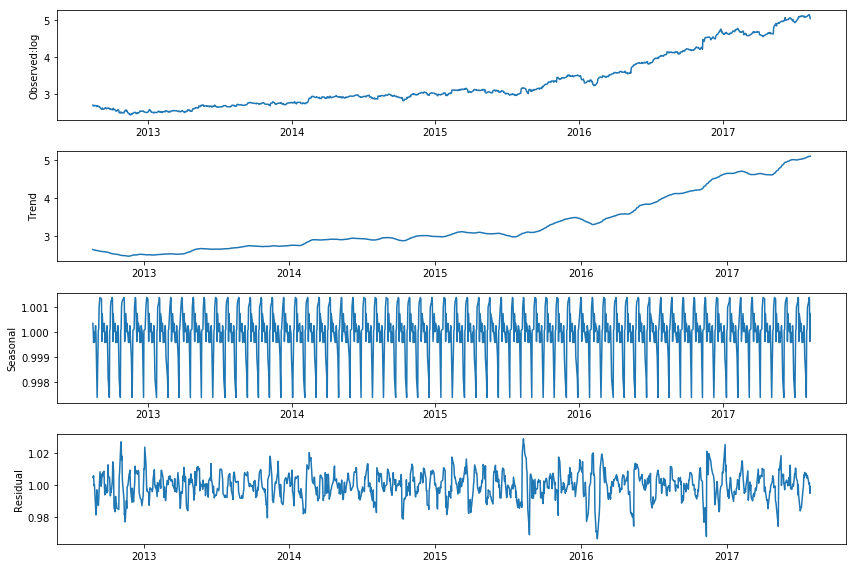

In [15]:
## ETS decomposition for NVDA

from statsmodels.tsa.seasonal import seasonal_decompose ## ignore warning, will disappear excute twice 
## index must be datetime type 

NVDA_decomposition = seasonal_decompose(NVDA['Natural Log'], model='multiplacative', freq=20)  
trend = NVDA_decomposition.trend
seasonal = NVDA_decomposition.seasonal
residual = NVDA_decomposition.resid

NVDA_ETS_Multi, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(NVDA['Natural Log'])
axes[0].set(ylabel='Observed:log')
axes[1].plot(trend)
axes[1].set(ylabel='Trend')
axes[2].plot(seasonal)
axes[2].set(ylabel='Seasonal')
axes[3].plot(residual)
axes[3].set(ylabel='Residual')
plt.tight_layout()

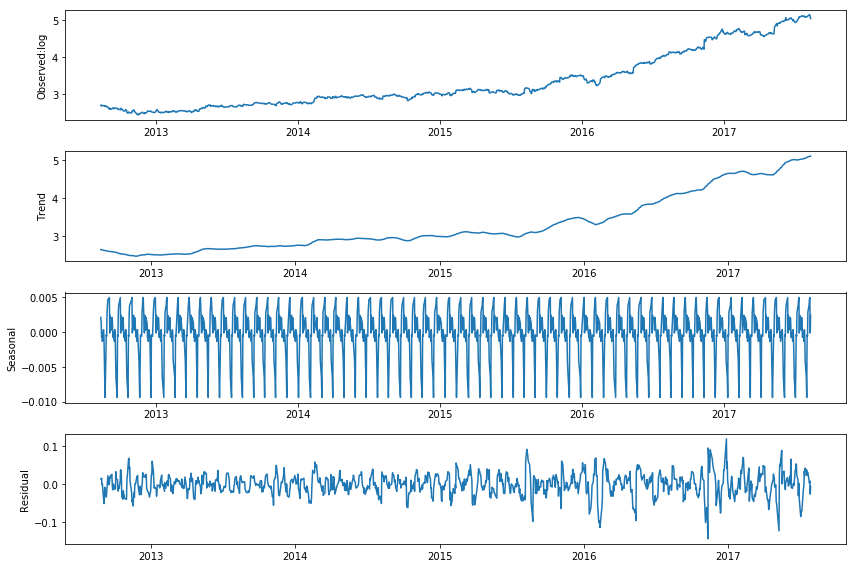

In [16]:
NVDA_decomposition_add = seasonal_decompose(NVDA['Natural Log'], model='additive', freq=20)  
trend = NVDA_decomposition_add.trend
seasonal = NVDA_decomposition_add.seasonal
residual = NVDA_decomposition_add.resid

NVDA_ETS_Add, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(NVDA['Natural Log'])
axes[0].set(ylabel='Observed:log')
axes[1].plot(trend)
axes[1].set(ylabel='Trend')
axes[2].plot(seasonal)
axes[2].set(ylabel='Seasonal')
axes[3].plot(residual)
axes[3].set(ylabel='Residual')
plt.tight_layout()